![image.png](attachment:image.png)

# Importing Necessary Libraries

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop,Adamax, Nadam
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import EfficientNetB3
from keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
from keras.applications.xception import Xception, decode_predictions, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

https://www.kaggle.com/code/rajmehra03/flower-recognition-cnn-keras

In [3]:
pwd

'/kaggle/working'

In [4]:
import os
print(os.listdir('/kaggle/input/flowers'))

['test', 'train']


In [5]:
my_data_dir='/kaggle/input/flowers'

In [6]:
os.listdir(my_data_dir)

['test', 'train']

In [7]:
#import os
#import shutil
#import random

# Define the source directory
#source_dir = "/Users/enejanhayytjanova/Desktop/My Githup/Deep Learning/CNN/flowers"
#train_dir = "train"
#test_dir = "test"

# Create train and test directories if not exist
#os.makedirs(train_dir, exist_ok=True)
#os.makedirs(test_dir, exist_ok=True)

# Define the list of folders
#folders = ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

# Define the train-test split ratio
#split_ratio = 0.9

# Loop through each folder
#for folder in folders:
    # Create train and test folders for each flower type
    #os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    #os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

    # Get list of files in the folder
   # files = os.listdir(os.path.join(source_dir, folder))

    # Shuffle the files
    #random.shuffle(files)

    # Calculate split index
    #split_index = int(len(files) * split_ratio)

    # Split files into train and test sets
   # train_files = files[:split_index]
   # test_files = files[split_index:]

    # Copy train files
    #for file in train_files:
      #  shutil.copy(os.path.join(source_dir, folder, file), os.path.join(train_dir, folder))

    # Copy test files
   # for file in test_files:
       # shutil.copy(os.path.join(source_dir, folder, file), os.path.join(test_dir, folder))


In [8]:
train_path = my_data_dir+'/train'
test_path = my_data_dir+'/test'

In [9]:
os.listdir(train_path)

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

**Let's check how many images there are.**

In [10]:
print("train_daisy:",  len(os.listdir(train_path+'/daisy')))
print("test_daisy:",len(os.listdir(test_path+'/daisy')))

print("train_rose:",len(os.listdir(train_path+'/rose')))
print("test_rose:",len(os.listdir(test_path+'/rose')))

print("train_tulip:",len(os.listdir(train_path+'/tulip')))
print("test_tulip:",len(os.listdir(test_path+'/tulip')))

print("train_dandelion:",len(os.listdir(train_path+'/dandelion')))
print("test_dandelion:",len(os.listdir(test_path+'/dandelion')))

print("train_sunflower:",len(os.listdir(train_path+'/sunflower')))
print("test_sunflower:",len(os.listdir(test_path+'/sunflower')))

train_daisy: 687
test_daisy: 77
train_rose: 705
test_rose: 79
train_tulip: 885
test_tulip: 99
train_dandelion: 946
test_dandelion: 106
train_sunflower: 659
test_sunflower: 74


In [11]:
path1=train_path+'/rose'+'/102501987_3cdb8e5394_n.jpg'
path2=train_path+'/tulip'+'/100930342_92e8746431_n.jpg'

rose_img=imread(path1)
tulip_img=imread(path2)

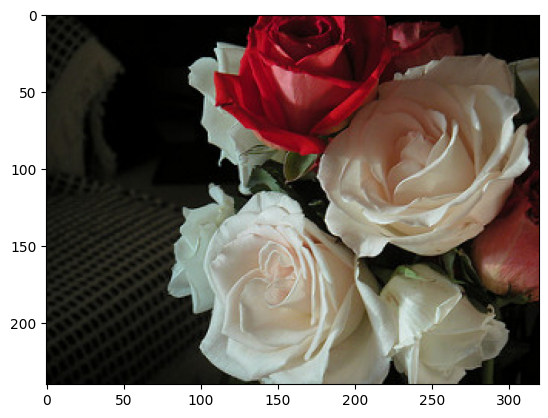

In [12]:
plt.imshow(rose_img);

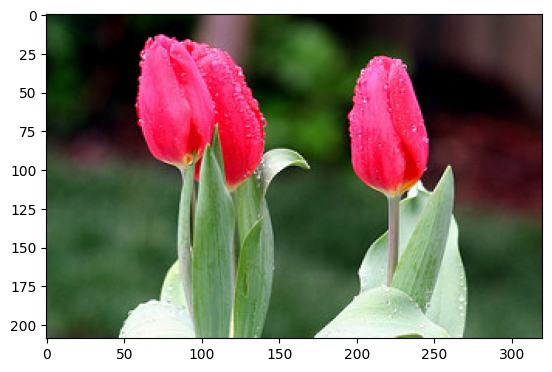

In [13]:
plt.imshow(tulip_img);

**Let's decide on the final dimension of these images.**

In [14]:
rose_img.max()

255

In [15]:
rose_img.min()

0

In [16]:
rose_img.shape

(240, 320, 3)

In [17]:
tulip_img.shape

(209, 320, 3)

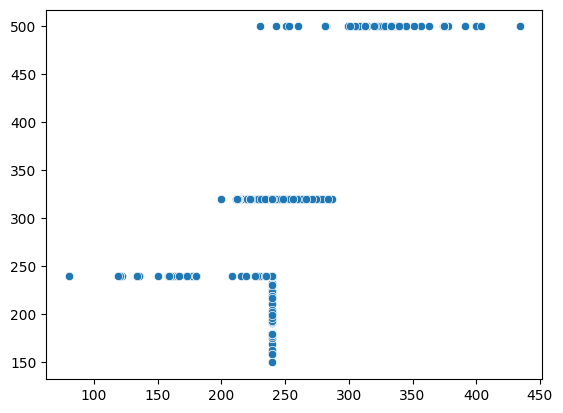

In [18]:
x= []
y = []
for image in os.listdir(train_path+'/rose'):

    img = imread(train_path+'/rose/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)
sns.scatterplot(x=x,y=y);    

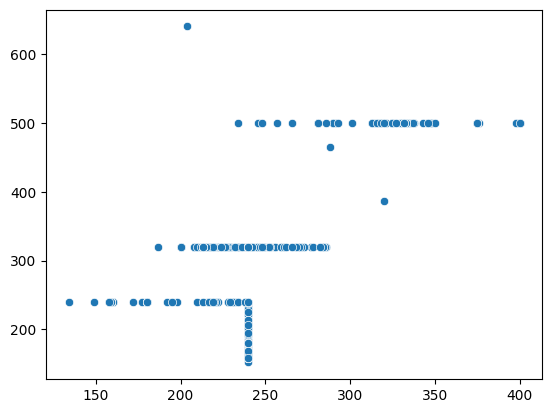

In [19]:
x= []
y = []
for image in os.listdir(train_path+'/sunflower'):

    img = imread(train_path+'/sunflower/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)
sns.scatterplot(x=x,y=y);  

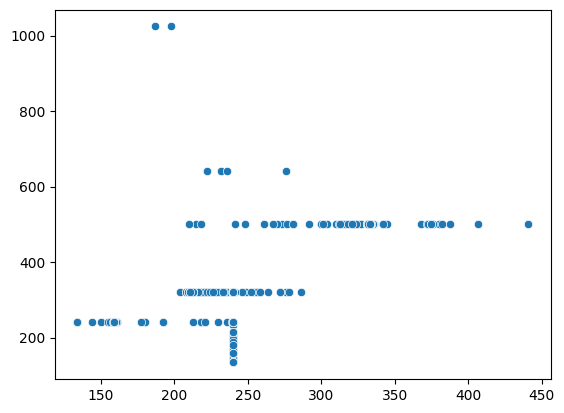

In [20]:
x= []
y = []
for image in os.listdir(train_path+'/tulip'):

    img = imread(train_path+'/tulip/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)
sns.scatterplot(x=x,y=y);

In [21]:

np.mean(x)

248.79435028248588

In [22]:
np.mean(y)

337.6372881355932

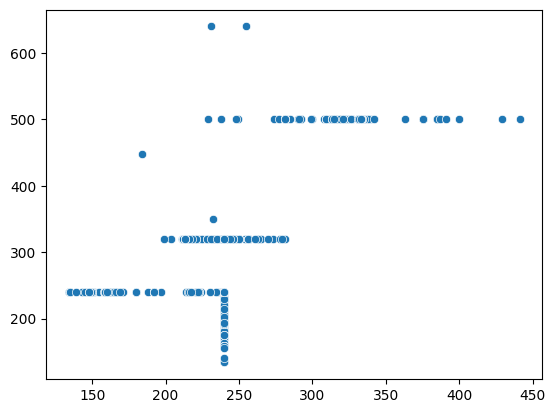

In [23]:
x= []
y = []
for image in os.listdir(train_path+'/daisy'):

    img = imread(train_path+'/daisy/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)
    
sns.scatterplot(x=x,y=y);  

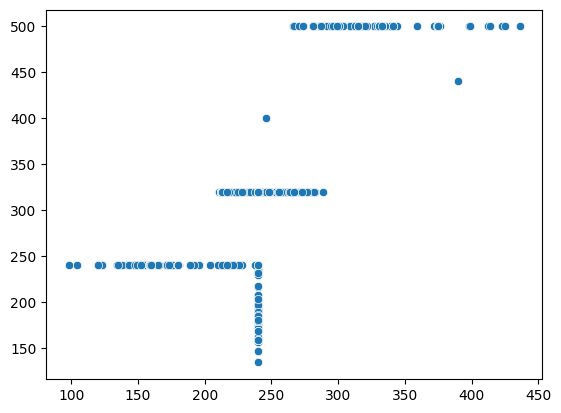

In [24]:
x= []
y = []
for image in os.listdir(train_path+'/dandelion'):

    img = imread(train_path+'/dandelion/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)
    
sns.scatterplot(x=x,y=y);  

(256,256) size will be approximate mean size for all

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [25]:
image_shape = (256,256,3)

In [26]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

image_gen_scale = ImageDataGenerator(rescale=1/255)

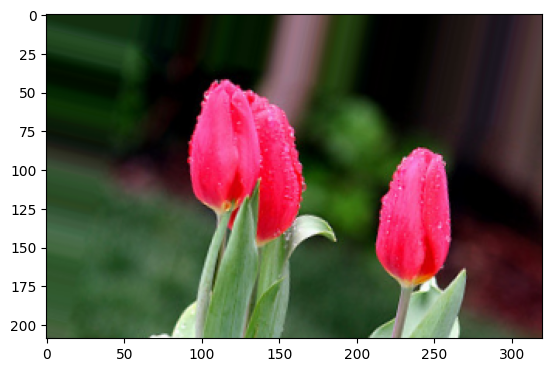

In [27]:
plt.imshow(image_gen.random_transform(tulip_img));

image_gen.flow_from_directory(train_path)

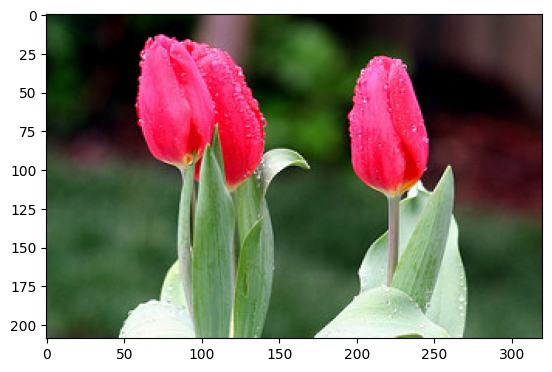

In [29]:
plt.imshow(image_gen_scale.random_transform(tulip_img));

# Modeling

# Model_1  (first try)    
*accuracy: 0.3237 - loss: 431.3643*

In [33]:
np.random.seed(42)
tf.random.set_seed(42)
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5, seed=42))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3, seed=42))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=42))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=42))

model.add(Dense(5, activation='softmax'))

model.compile(Adamax(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,863,173 (26.18 MB)

 Trainable params: 6,860,197 (26.17 MB)

 Non-trainable params: 2,976 (11.62 KB)

In [34]:

early_stop = EarlyStopping(monitor='val_loss',patience=5)

batch_size=32

train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


test_image_gen = image_gen_scale.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)



Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [36]:
results_m1 = model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose= 1,
                    callbacks=[early_stop])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 1:17:03 38s/step - accuracy: 0.2188 - loss: 2.2558

I0000 00:00:1714248918.891725     131 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714248918.922656     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  4/122 ━━━━━━━━━━━━━━━━━━━━ 14:21 7s/step - accuracy: 0.2403 - loss: 2.1826 

W0000 00:00:1714248940.754440     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.2586 - loss: 1.9716

W0000 00:00:1714248955.582982     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 82s 364ms/step - accuracy: 0.2589 - loss: 1.9705 - val_accuracy: 0.2437 - val_loss: 1.7253
Epoch 2/50


W0000 00:00:1714248963.013948     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.3786 - loss: 1.5815 - val_accuracy: 0.2437 - val_loss: 2.3835
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.4306 - loss: 1.4012 - val_accuracy: 0.2874 - val_loss: 2.1661
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4666 - loss: 1.2895 - val_accuracy: 0.3448 - val_loss: 1.5699
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4938 - loss: 1.2196 - val_accuracy: 0.4575 - val_loss: 1.4507
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.5435 - loss: 1.1210 - val_accuracy: 0.5816 - val_loss: 1.0296
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5757 - loss: 1.0366 - val_accuracy: 0.6322 - val_loss: 0.9205
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.6133 - loss: 0.9965 - val_accuracy: 0.6598 - val_loss: 0.9171
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.6158 - loss: 0.9782 - val_a

In [37]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_1.0.keras')

In [38]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,accuracy,loss,val_accuracy,val_loss
17,0.766100,0.643314,0.652874,0.911851
18,0.791860,0.602890,0.671264,0.930268
19,0.807831,0.565790,0.747126,0.767871
20,0.818650,0.556014,0.744828,0.813334
21,0.833849,0.491361,0.678161,0.922848


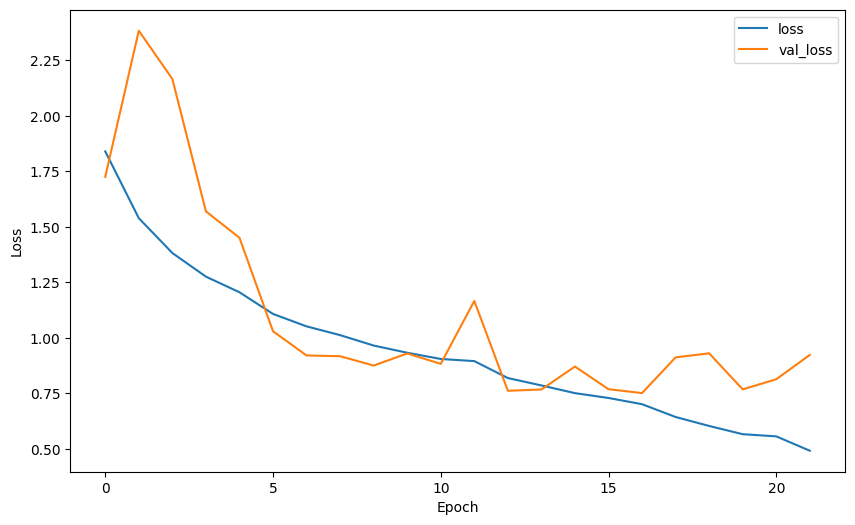

In [39]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

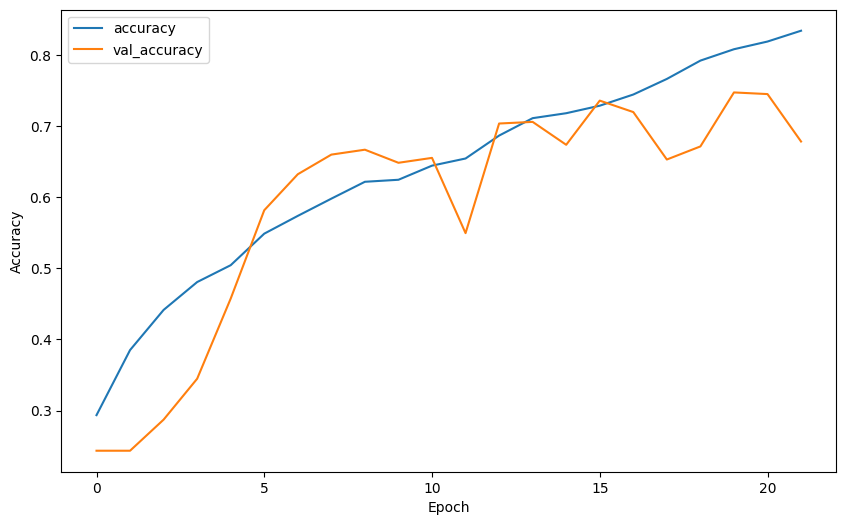

In [40]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [28]:
model_1_0 = {'model': 'model_1.0','accuracy': 0.82, 'val_accuracy':  0.67}

In [42]:
model.metrics_names

['loss', 'compile_metrics']

In [43]:
model.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6657 - loss: 0.9721


[0.9228484630584717, 0.6781609058380127]

In [44]:
pred_probabilities = model.predict(test_image_gen)

 4/14 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

W0000 00:00:1714249241.323011     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step


W0000 00:00:1714249243.346516     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [45]:
pred_probabilities

array([[1.9266427e-03, 2.8749923e-03, 6.1787803e-02, 3.6347520e-03,
        9.2977577e-01],
       [6.2559319e-01, 8.5514531e-02, 1.9130294e-01, 2.9985234e-02,
        6.7604154e-02],
       [4.8608016e-02, 3.8372729e-02, 5.2104586e-01, 2.1871081e-02,
        3.7010229e-01],
       ...,
       [9.8571002e-01, 4.2541572e-03, 2.9003390e-03, 5.6214589e-03,
        1.5139348e-03],
       [9.9451524e-01, 1.2044606e-03, 1.2259047e-03, 2.1587075e-03,
        8.9576904e-04],
       [2.1025667e-02, 2.5140993e-02, 3.0830690e-01, 1.0461576e-02,
        6.3506490e-01]], dtype=float32)

In [46]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [47]:
predictions = pred_probabilities > 0.5
predictions[:100]

array([[False, False, False, False,  True],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False,  Tr

# With ImageGenerator

In [48]:

early_stop = EarlyStopping(monitor='val_loss',patience=5)

batch_size=32

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)

image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)



Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [49]:
results_m1 = model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose= 1,
                    callbacks=[early_stop])

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 72s 557ms/step - accuracy: 0.7382 - loss: 0.7314 - val_accuracy: 0.3218 - val_loss: 288.0591
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 72s 557ms/step - accuracy: 0.7687 - loss: 0.6806 - val_accuracy: 0.3264 - val_loss: 282.0888
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 73s 569ms/step - accuracy: 0.7629 - loss: 0.6573 - val_accuracy: 0.3356 - val_loss: 338.1190
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 572ms/step - accuracy: 0.8026 - loss: 0.5722 - val_accuracy: 0.2437 - val_loss: 381.2088
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 72s 559ms/step - accuracy: 0.7927 - loss: 0.5935 - val_accuracy: 0.2276 - val_loss: 212.9937
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 73s 565ms/step - accuracy: 0.8059 - loss: 0.5731 - val_accuracy: 0.3586 - val_loss: 153.1497
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 73s 565ms/step - accuracy: 0.8221 - loss: 0.5444 - val_accuracy: 0.1839 - val_loss: 420.0497
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 568ms/step - accuracy: 0.

In [50]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_1.1.keras')

In [51]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,accuracy,loss,val_accuracy,val_loss
6,0.806285,0.567333,0.183908,420.049683
7,0.803709,0.568066,0.193103,364.294983
8,0.818908,0.532702,0.331034,176.170044
9,0.817620,0.527468,0.349425,169.299011
10,0.823287,0.504775,0.170115,326.693237


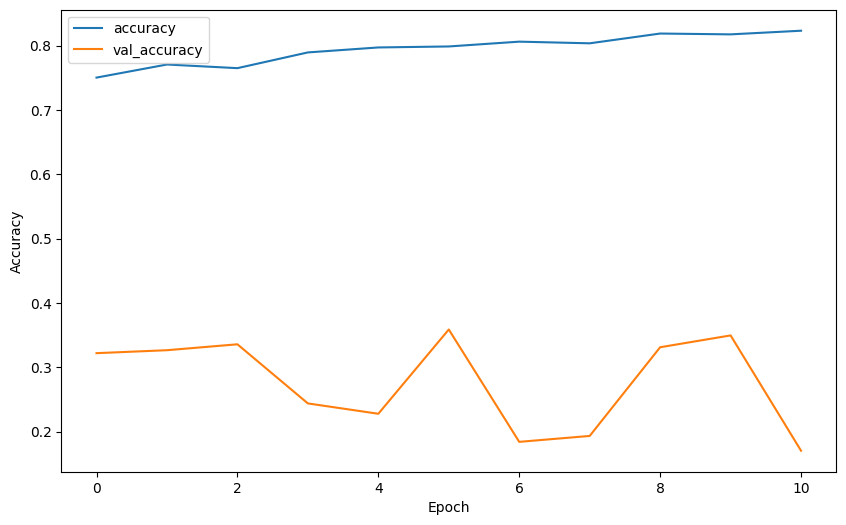

In [52]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [29]:
model_1_1 ={'model': 'model_1.1','accuracy': 0.82, 'val_accuracy': 0.17}

# With Optimizer Adam and without IG(imagegenerator)

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5, seed=42))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3, seed=42))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=42))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=42))

model.add(Dense(5, activation='softmax'))

model.compile(Adam(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,863,173 (26.18 MB)

 Trainable params: 6,860,197 (26.17 MB)

 Non-trainable params: 2,976 (11.62 KB)

In [55]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

batch_size=32

train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


test_image_gen = image_gen_scale.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)



Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [56]:
results_m1 = model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose= 1,
                    callbacks=[early_stop])

Epoch 1/50
  2/122 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.2188 - loss: 1.8254

W0000 00:00:1714250063.240702     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


106/122 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.2454 - loss: 1.9318

W0000 00:00:1714250084.202618     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.2484 - loss: 1.9158

W0000 00:00:1714250087.360124     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 45s 212ms/step - accuracy: 0.2486 - loss: 1.9148 - val_accuracy: 0.2575 - val_loss: 1.7851
Epoch 2/50


W0000 00:00:1714250089.026120     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.3338 - loss: 1.5810 - val_accuracy: 0.2736 - val_loss: 1.6899
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.4256 - loss: 1.3232 - val_accuracy: 0.3057 - val_loss: 1.8059
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.5140 - loss: 1.1959 - val_accuracy: 0.3287 - val_loss: 2.2783
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.5737 - loss: 1.0792 - val_accuracy: 0.5632 - val_loss: 1.1070
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.5848 - loss: 1.0363 - val_accuracy: 0.5724 - val_loss: 1.1309
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.6206 - loss: 0.9491 - val_accuracy: 0.6207 - val_loss: 0.9919
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.6552 - loss: 0.8875 - val_accuracy: 0.6138 - val_loss: 1.0807
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.6905 - loss: 0.8322 - val

In [57]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_1.2.keras')

In [58]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss
11,0.729263,0.762039,0.659770,0.956882
12,0.744719,0.710265,0.588506,1.182559
13,0.738279,0.717605,0.712644,0.884068
14,0.757342,0.697355,0.521839,1.460053
15,0.764039,0.674152,0.602299,1.120954


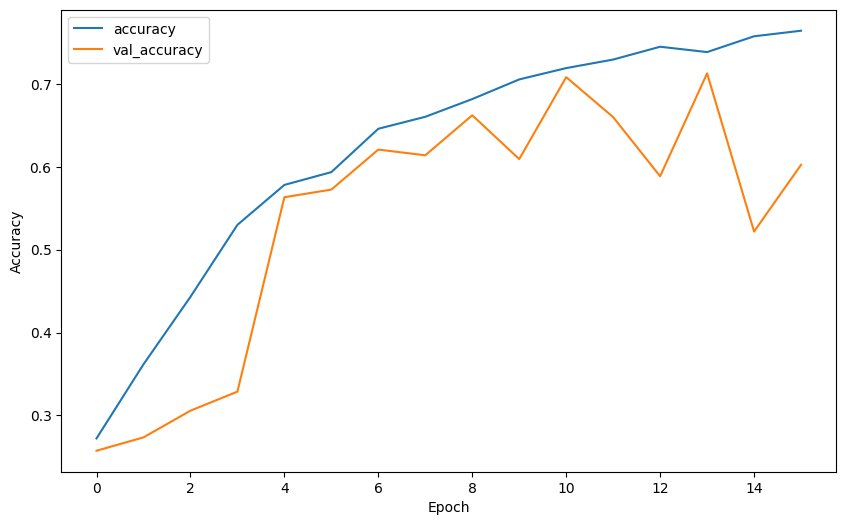

In [59]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [30]:
model_1_2 = {'model': 'model_1.2','accuracy': 0.77, 'val_accuracy': 0.60}

# Optimizer Nadam

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5, seed=42))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3, seed=42))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=42))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed=42))

model.add(Dense(5, activation='softmax'))



model.compile(Nadam(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,863,173 (26.18 MB)

 Trainable params: 6,860,197 (26.17 MB)

 Non-trainable params: 2,976 (11.62 KB)

In [62]:
checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


In [63]:
results_m1 = model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose= 1,
                    callbacks=[early_stop, checkpoint,reduce_lr])

Epoch 1/50
  2/122 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.2812 - loss: 2.0536 

W0000 00:00:1714250333.886252     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 83/122 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.2516 - loss: 1.9548

W0000 00:00:1714250355.187730     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2630 - loss: 1.9066

W0000 00:00:1714250360.650591     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 3.04678, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714250362.621527     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 51s 240ms/step - accuracy: 0.2633 - loss: 1.9054 - val_accuracy: 0.2437 - val_loss: 3.0468 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4025 - loss: 1.4368
Epoch 2: val_loss improved from 3.04678 to 2.54549, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.4029 - loss: 1.4361 - val_accuracy: 0.2437 - val_loss: 2.5455 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5337 - loss: 1.1512
Epoch 3: val_loss improved from 2.54549 to 1.60586, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.5337 - loss: 1.1511 - val_accuracy: 0.3149 - val_loss: 1.6059 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5542 - loss: 1.1068
Epoch 4: val_loss improved from 1.60586 to 1.30123, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━

In [64]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.301391,1.752329,0.243678,3.046785,0.001
1,0.441525,1.349164,0.243678,2.545490,0.001
2,0.541473,1.135546,0.314943,1.605857,0.001
3,0.574189,1.062077,0.485057,1.301230,0.001
4,0.609222,0.978507,0.452874,1.341112,0.001


In [65]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_1.3.keras')

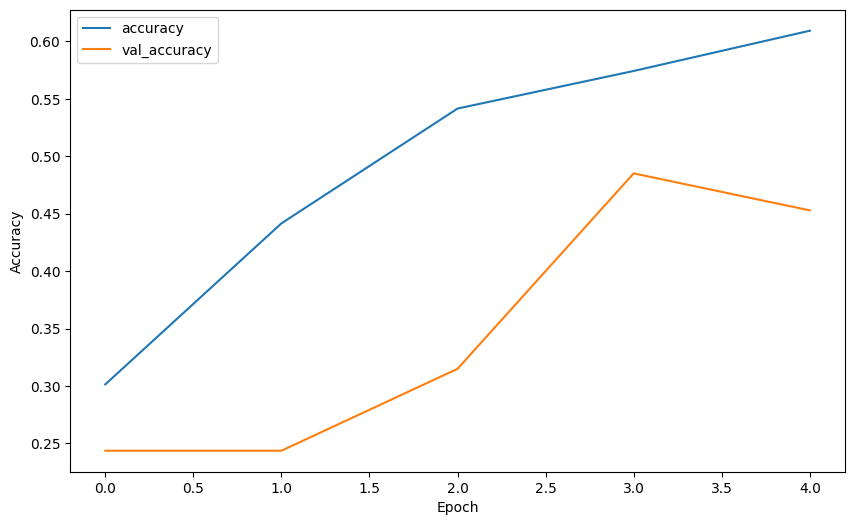

In [66]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [31]:
model_1_3 = {'model': 'model_1.3','accuracy': 0.61, 'val_accuracy': 0.45}

In [68]:
model.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.4943 - loss: 1.2576


[1.3411122560501099, 0.452873557806015]

# AdaGrad

In [69]:
model.compile(Adagrad(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,863,173 (26.18 MB)

 Trainable params: 6,860,197 (26.17 MB)

 Non-trainable params: 2,976 (11.62 KB)

In [70]:
results_m1 = model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose= 1,
                    callbacks=[early_stop])

Epoch 1/50
  2/122 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.6094 - loss: 1.1463

W0000 00:00:1714250446.174585     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 41/122 ━━━━━━━━━━━━━━━━━━━━ 31s 386ms/step - accuracy: 0.6398 - loss: 0.9526

W0000 00:00:1714250461.554938     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6430 - loss: 0.9224

W0000 00:00:1714250472.829094     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 44s 236ms/step - accuracy: 0.6430 - loss: 0.9222 - val_accuracy: 0.6276 - val_loss: 0.9003
Epoch 2/50


W0000 00:00:1714250474.802929     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.6573 - loss: 0.8953 - val_accuracy: 0.6667 - val_loss: 0.8134
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.6762 - loss: 0.8385 - val_accuracy: 0.6782 - val_loss: 0.7855
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.6693 - loss: 0.8348 - val_accuracy: 0.6782 - val_loss: 0.7831
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.6821 - loss: 0.8136 - val_accuracy: 0.6759 - val_loss: 0.7698
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.6907 - loss: 0.8030 - val_accuracy: 0.6851 - val_loss: 0.7671
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.6852 - loss: 0.8039 - val_accuracy: 0.6874 - val_loss: 0.7655
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.6889 - loss: 0.7836 - val_accuracy: 0.6828 - val_loss: 0.7508
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.6889 - loss: 0.7769 - val

In [71]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss
26,0.744977,0.676114,0.728736,0.664805
27,0.747038,0.676185,0.696552,0.707067
28,0.746265,0.664549,0.735632,0.669966
29,0.745750,0.664318,0.728736,0.692923
30,0.755538,0.646117,0.731034,0.662865


In [72]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_1.4.keras')

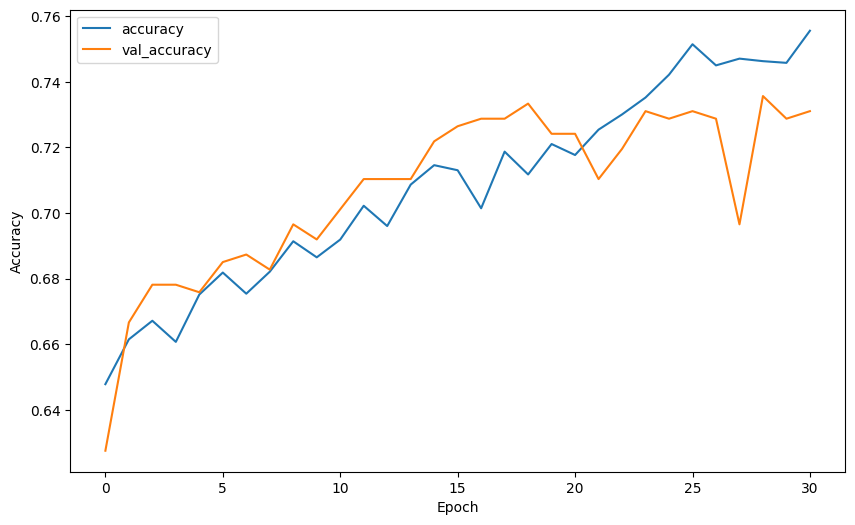

In [73]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [32]:
model_1_4 = {'model': 'model_1.4','accuracy': 0.76, 'val_accuracy': 0.73}

In [75]:
model.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7339 - loss: 0.6617


[0.6628652215003967, 0.7310344576835632]

# Model_2

In [76]:
np.random.seed(42)
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Flatten())

model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25, seed=42))

model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.40, seed=42))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.25, seed=42))
model_2.add(Dense(5, activation='softmax'))

model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

In [77]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 60, 60, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,441,669 (13.13 MB)

 Trainable params: 3,440,517 (13.12 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [78]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

batch_size=16

train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)



image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [79]:
model_2.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
  1/243 ━━━━━━━━━━━━━━━━━━━━ 1:26:07 21s/step - accuracy: 0.4000 - loss: 2.0517

W0000 00:00:1714250910.485108     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  3/243 ━━━━━━━━━━━━━━━━━━━━ 36:26 9s/step - accuracy: 0.2847 - loss: 2.1788   

W0000 00:00:1714250928.611775     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3796 - loss: 1.6287

W0000 00:00:1714250943.965703     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


243/243 ━━━━━━━━━━━━━━━━━━━━ 58s 150ms/step - accuracy: 0.3798 - loss: 1.6280 - val_accuracy: 0.3793 - val_loss: 153.6600
Epoch 2/50


W0000 00:00:1714250946.836713     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.5163 - loss: 1.2085 - val_accuracy: 0.2368 - val_loss: 745.3990
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.5756 - loss: 1.0290 - val_accuracy: 0.3356 - val_loss: 678.5112
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.6220 - loss: 0.9707 - val_accuracy: 0.2966 - val_loss: 1095.4775
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6468 - loss: 0.9168 - val_accuracy: 0.2920 - val_loss: 1174.3523
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6887 - loss: 0.8411 - val_accuracy: 0.3195 - val_loss: 664.0630
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7071 - loss: 0.7725 - val_accuracy: 0.1839 - val_loss: 2050.2363
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7435 - loss: 0.7148 - val_accuracy: 0.3563 - val_loss: 805.4791
Epoch 9/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7738 - loss: 0.6

In [80]:
summary = pd.DataFrame(model_2.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss
6,0.705049,0.796754,0.183908,2050.236328
7,0.744462,0.708561,0.356322,805.479065
8,0.771252,0.635665,0.291954,620.008667
9,0.769191,0.608304,0.262069,487.700256
10,0.806543,0.546532,0.303448,1166.150269


In [81]:
from tensorflow.keras.saving import save_model

save_model(model_2, 'model_2.keras')

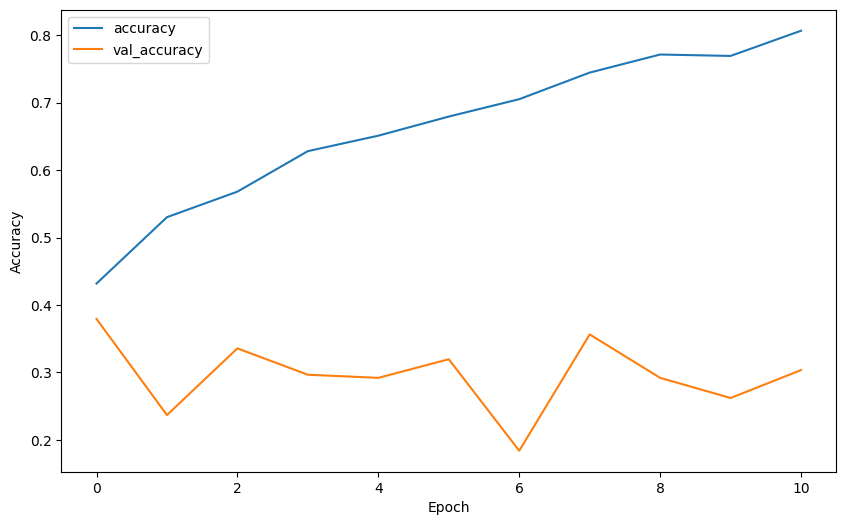

In [82]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [33]:
model_2 = {'model': 'model_2','accuracy': 0.81, 'val_accuracy': 0.30}

# Model structure from: With ImageGeneratorWith ImageGenerator
https://www.kaggle.com/code/ismetgocer/flowers-detection-project-using-10-cnn-algorithms#3.-CNN-MODELS

In [84]:
np.random.seed(42)
tf.random.set_seed(42)

model_3 = Sequential()

image_shape=(256,256,3)

model_3.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu', 
                 padding = 'same')) 
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Flatten())


model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3, seed=42))

model_3.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate=0.001) 

model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

#Checkpoint; val los u takip edecek, min oldugu durumdaki modeli disa aktaracak, daha min los elde ettikce oncekini silip onu kaydedecek.
checkpoint = ModelCheckpoint('model_3.keras', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk.

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,489,285 (5.68 MB)

 Trainable params: 1,487,621 (5.67 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [85]:
batch_size = 32
train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)



image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [86]:
model_3.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 1:31:34 45s/step - accuracy: 0.1875 - loss: 2.5111

W0000 00:00:1714251151.941895     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.4296 - loss: 1.5237

W0000 00:00:1714251195.252657     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714251196.411406     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 230.71861, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 99s 446ms/step - accuracy: 0.4303 - loss: 1.5218 - val_accuracy: 0.1862 - val_loss: 230.7186 - learning_rate: 0.0010
Epoch 2/50


W0000 00:00:1714251205.878478     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6079 - loss: 1.0261
Epoch 2: val_loss did not improve from 230.71861
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - accuracy: 0.6080 - loss: 1.0258 - val_accuracy: 0.1977 - val_loss: 259.3612 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6436 - loss: 0.8899
Epoch 3: val_loss did not improve from 230.71861
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6438 - loss: 0.8898 - val_accuracy: 0.2460 - val_loss: 312.9908 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6910 - loss: 0.8186
Epoch 4: val_loss did not improve from 230.71861
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.6911 - loss: 0.8184 - val_accuracy: 0.2805 - val_loss: 333.0741 - learning_rate: 0.0010
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7353 - loss: 0.7219
Epoch 5: val_loss did not improve from 230.71861
122/122 ━━━━━━━━━━━━━━━━━

In [87]:
from tensorflow.keras.saving import save_model

save_model(model_3, 'model_3.0.keras')

In [88]:
summary = pd.DataFrame(model_3.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
20,0.887172,0.325071,0.452874,158.136490,0.0001
21,0.891293,0.306385,0.471264,154.234360,0.0001
22,0.889748,0.307239,0.521839,121.212830,0.0001
23,0.899536,0.285600,0.455172,129.653366,0.0001
24,0.898248,0.281450,0.489655,168.594223,0.0001


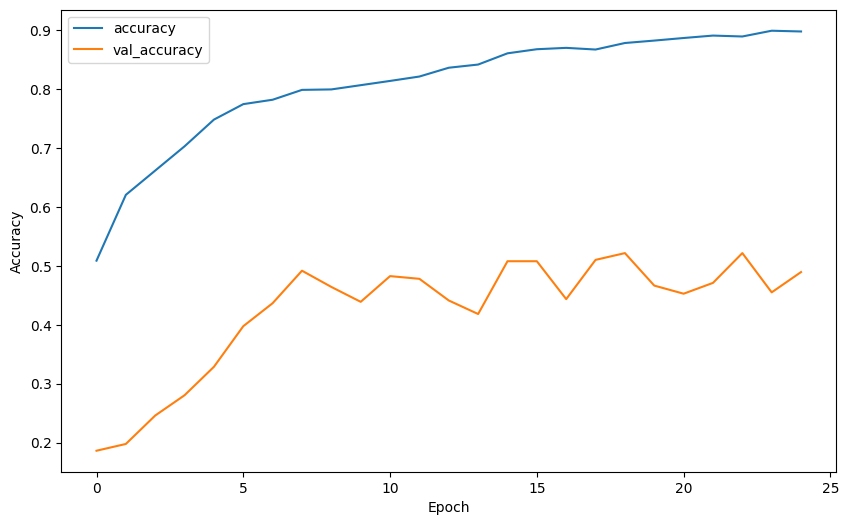

In [89]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [34]:
model_3_0 = {'model': 'model_3.0','accuracy': 0.90, 'val_accuracy': 0.48}

# With ImageGenerator

In [91]:
np.random.seed(42)
tf.random.set_seed(42)

model_3 = Sequential()

image_shape=(224,224,3)

model_3.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu', 
                 padding = 'same')) 
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Flatten())


model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3, seed=42))

model_3.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate=0.001) 

model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

#Checkpoint; val los u takip edecek, min oldugu durumdaki modeli disa aktaracak, daha min los elde ettikce oncekini silip onu kaydedecek.
checkpoint = ModelCheckpoint('model_3.keras', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk.

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,259,909 (4.81 MB)

 Trainable params: 1,258,245 (4.80 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [92]:
image_gen= ImageDataGenerator(rotation_range = 15, 
                              width_shift_range = 0.1, 
                              height_shift_range=0.1, 
                              shear_range = 0.1, 
                              zoom_range = 0.2, 
                              horizontal_flip = True)


batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(224,224),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [93]:
model_3.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 1:12:02 36s/step - accuracy: 0.3438 - loss: 2.3263

W0000 00:00:1714251757.198517     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 58/122 ━━━━━━━━━━━━━━━━━━━━ 48s 761ms/step - accuracy: 0.3615 - loss: 1.8395

W0000 00:00:1714251800.668144     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.4164 - loss: 1.6327

W0000 00:00:1714251828.614418     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.54365, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 114s 645ms/step - accuracy: 0.4170 - loss: 1.6305 - val_accuracy: 0.5011 - val_loss: 1.5436 - learning_rate: 0.0010
Epoch 2/50


W0000 00:00:1714251835.258999     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.5668 - loss: 1.1117
Epoch 2: val_loss improved from 1.54365 to 1.29924, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 58s 451ms/step - accuracy: 0.5670 - loss: 1.1113 - val_accuracy: 0.5816 - val_loss: 1.2992 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6102 - loss: 1.0158
Epoch 3: val_loss improved from 1.29924 to 0.85552, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 59s 453ms/step - accuracy: 0.6102 - loss: 1.0156 - val_accuracy: 0.6207 - val_loss: 0.8555 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6224 - loss: 0.9589
Epoch 4: val_loss did not improve from 0.85552
122/122 ━━━━━━━━━━━━━━━━━━━━ 58s 451ms/step - accuracy: 0.6226 - loss: 0.9586 - val_accuracy: 0.6391 - val_loss: 0.8856 - learning_rate: 0.0010
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.6576 - loss: 0.9029
Epoch 5: val_los

In [94]:
summary = pd.DataFrame(model_3.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
29,0.848017,0.418509,0.836782,0.469953,0.0001
30,0.839516,0.431599,0.811494,0.508148,0.0001
31,0.848274,0.420421,0.809195,0.527866,0.0001
32,0.850850,0.411644,0.788506,0.623183,0.0001
33,0.857032,0.405671,0.822989,0.482074,0.0001


In [95]:
from tensorflow.keras.saving import save_model

save_model(model_3, 'model_3.1.keras')

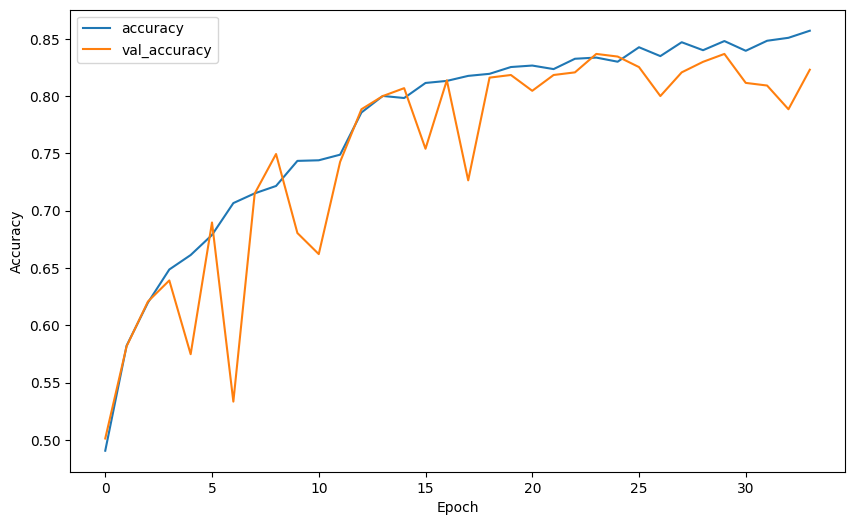

In [96]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [35]:
model_3_1 = {'model': 'model_3.1','accuracy': 0.85, 'val_accuracy': 0.82}

# Adamax Optimizer

In [98]:
np.random.seed(42)
tf.random.set_seed(42)

model_3 = Sequential()

image_shape=(224,224,3)

model_3.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu', 
                 padding = 'same')) 
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Flatten())


model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3, seed=42))

model_3.add(Dense(5, activation='softmax'))

optimizer = Adamax(learning_rate=0.001) 

model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

#Checkpoint; val los u takip edecek, min oldugu durumdaki modeli disa aktaracak, daha min los elde ettikce oncekini silip onu kaydedecek.
checkpoint = ModelCheckpoint('model_3.keras', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk.

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,259,909 (4.81 MB)

 Trainable params: 1,258,245 (4.80 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [99]:
model_3.fit(train_image_gen,epochs=100,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/100
  1/122 ━━━━━━━━━━━━━━━━━━━━ 34:05 17s/step - accuracy: 0.0312 - loss: 2.4884

W0000 00:00:1714253808.464328     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  7/122 ━━━━━━━━━━━━━━━━━━━━ 3:38 2s/step - accuracy: 0.1973 - loss: 2.2954  

W0000 00:00:1714253819.938752     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.3479 - loss: 1.7464

W0000 00:00:1714253871.617583     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.16526, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 82s 534ms/step - accuracy: 0.3485 - loss: 1.7445 - val_accuracy: 0.5494 - val_loss: 1.1653 - learning_rate: 0.0010
Epoch 2/100


W0000 00:00:1714253873.063373     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.5154 - loss: 1.2540
Epoch 2: val_loss improved from 1.16526 to 1.07224, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 58s 451ms/step - accuracy: 0.5154 - loss: 1.2537 - val_accuracy: 0.5632 - val_loss: 1.0722 - learning_rate: 0.0010
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.5712 - loss: 1.1085
Epoch 3: val_loss did not improve from 1.07224
122/122 ━━━━━━━━━━━━━━━━━━━━ 59s 453ms/step - accuracy: 0.5712 - loss: 1.1086 - val_accuracy: 0.5379 - val_loss: 1.0918 - learning_rate: 0.0010
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5790 - loss: 1.0736
Epoch 4: val_loss improved from 1.07224 to 1.04117, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 58s 446ms/step - accuracy: 0.5791 - loss: 1.0734 - val_accuracy: 0.5862 - val_loss: 1.0412 - learning_rate: 0.0010
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.6118 - loss: 0.9904
Epoch 5: val_

In [100]:
summary = pd.DataFrame(model_3.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
11,0.723854,0.745432,0.671264,1.057122,0.0002
12,0.724626,0.736068,0.671264,1.051497,0.0001
13,0.719990,0.739283,0.671264,1.125231,0.0001
14,0.724626,0.725133,0.645977,1.179356,0.0001
15,0.734673,0.724840,0.685057,1.070216,0.0001


In [101]:
from tensorflow.keras.saving import save_model

save_model(model_3, 'model_3.2.keras')

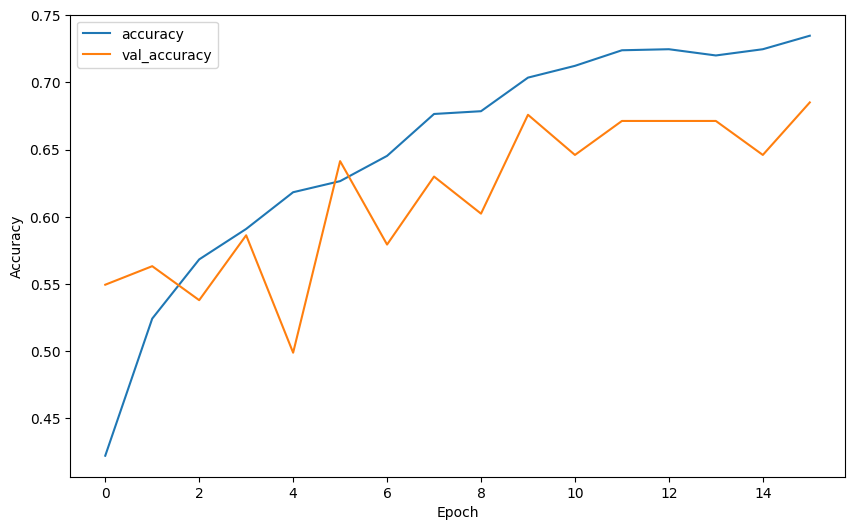

In [102]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [36]:
model_3_2 = {'model': 'model_3.2','accuracy': 0.73, 'val_accuracy': 0.68}

In [104]:
np.random.seed(42)
tf.random.set_seed(42)

model_3 = Sequential()

image_shape=(224,224,3)

model_3.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu', 
                 padding = 'same')) 
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Flatten())


model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3, seed=42))

model_3.add(Dense(5, activation='softmax'))

optimizer = Nadam(learning_rate=0.001) 

model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

#Checkpoint; val los u takip edecek, min oldugu durumdaki modeli disa aktaracak, daha min los elde ettikce oncekini silip onu kaydedecek.
checkpoint = ModelCheckpoint('model_3.keras', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk.

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,259,909 (4.81 MB)

 Trainable params: 1,258,245 (4.80 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [105]:
model_3.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 39:04 19s/step - accuracy: 0.2812 - loss: 2.5424

W0000 00:00:1714254769.235559     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/122 ━━━━━━━━━━━━━━━━━━━━ 12s 561ms/step - accuracy: 0.4150 - loss: 1.6098

W0000 00:00:1714254824.855660     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4263 - loss: 1.5653

W0000 00:00:1714254832.851499     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.67634, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 84s 537ms/step - accuracy: 0.4267 - loss: 1.5635 - val_accuracy: 0.4644 - val_loss: 1.6763 - learning_rate: 0.0010
Epoch 2/50


W0000 00:00:1714254834.179347     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.5921 - loss: 1.0554
Epoch 2: val_loss improved from 1.67634 to 1.01911, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 58s 447ms/step - accuracy: 0.5922 - loss: 1.0553 - val_accuracy: 0.6253 - val_loss: 1.0191 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.6245 - loss: 0.9575
Epoch 3: val_loss improved from 1.01911 to 0.86235, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 57s 446ms/step - accuracy: 0.6245 - loss: 0.9575 - val_accuracy: 0.6460 - val_loss: 0.8624 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6703 - loss: 0.8652
Epoch 4: val_loss improved from 0.86235 to 0.84170, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 57s 444ms/step - accuracy: 0.6702 - loss: 0.8653 - val_accuracy: 0.6851 - val_loss: 0.8417 - learning_rate: 0.0010
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.6

In [115]:
summary = pd.DataFrame(model_3.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.332561,1.893942,0.434483,1.289433,0.001
1,0.420917,1.554739,0.489655,1.184449,0.001


In [116]:
from tensorflow.keras.saving import save_model

save_model(model_3, 'model_3.3.keras')

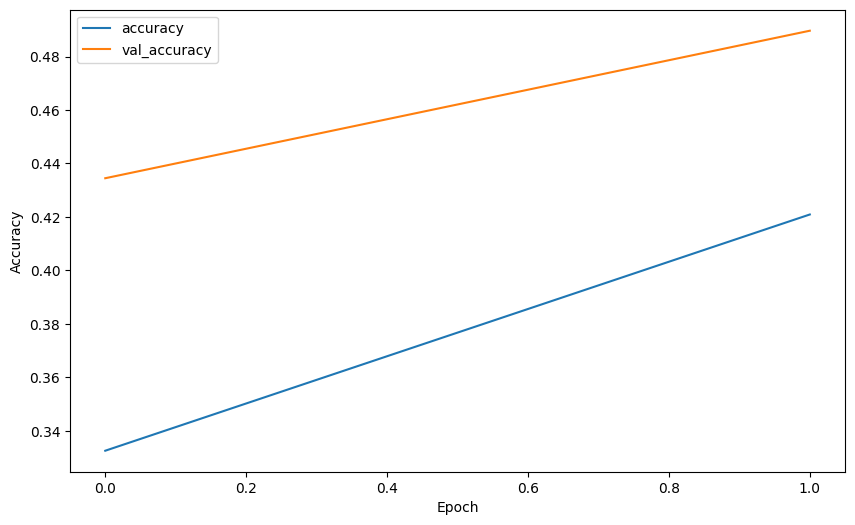

In [117]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [118]:
model_3.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5085 - loss: 1.1682


[1.1933894157409668, 0.4804597795009613]

In [37]:
model_3_3 = {'model': 'model_3.3','accuracy': 0.87, 'val_accuracy': 0.84}

# Adagrad optimizer

In [131]:
np.random.seed(42)
tf.random.set_seed(42)

model_3 = Sequential()

image_shape=(224,224,3)

model_3.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu', 
                 padding = 'same')) 
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3, seed=42))


model_3.add(Flatten())


model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3, seed=42))

model_3.add(Dense(5, activation='softmax'))

optimizer = Adagrad(learning_rate=0.001) 

model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,              
              metrics=['accuracy'])

#Checkpoint; val los u takip edecek, min oldugu durumdaki modeli disa aktaracak, daha min los elde ettikce oncekini silip onu kaydedecek.
checkpoint = ModelCheckpoint('model_3.keras', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

#LR'i optimize ediyoruz;
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001) 
# baslangic lr ile basla, val_loss 3 adim boyunca dusmezse lr ile factor oranini carparak lr yi dusur 
# ve yola yeni lr ile devam et. Bu isleme lr min 0.0001 olana kadar devam et demis olduk.

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,259,909 (4.81 MB)

 Trainable params: 1,258,245 (4.80 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [132]:
model_3.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 30:29 15s/step - accuracy: 0.3125 - loss: 2.0941

W0000 00:00:1714257898.050974     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


115/122 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - accuracy: 0.2956 - loss: 2.0148

W0000 00:00:1714257959.771680     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.2979 - loss: 2.0061

W0000 00:00:1714257961.661626     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.37289, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 80s 537ms/step - accuracy: 0.2982 - loss: 2.0049 - val_accuracy: 0.4690 - val_loss: 1.3729 - learning_rate: 0.0010
Epoch 2/50


W0000 00:00:1714257963.099992     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4059 - loss: 1.6328
Epoch 2: val_loss improved from 1.37289 to 1.21558, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 60s 460ms/step - accuracy: 0.4060 - loss: 1.6323 - val_accuracy: 0.4759 - val_loss: 1.2156 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.4522 - loss: 1.4832
Epoch 3: val_loss did not improve from 1.21558
122/122 ━━━━━━━━━━━━━━━━━━━━ 59s 458ms/step - accuracy: 0.4523 - loss: 1.4830 - val_accuracy: 0.4529 - val_loss: 1.2570 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4670 - loss: 1.3975
Epoch 4: val_loss improved from 1.21558 to 1.19110, saving model to model_3.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 59s 458ms/step - accuracy: 0.4671 - loss: 1.3974 - val_accuracy: 0.4920 - val_loss: 1.1911 - learning_rate: 0.0010
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.4881 - loss: 1.3768
Epoch 5: val_los

In [133]:
summary = pd.DataFrame(model_3.history.history)
summary

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.337713,1.859501,0.468966,1.372893,0.0010
1,0.422978,1.567481,0.475862,1.215585,0.0010
2,0.462648,1.460433,0.452874,1.257020,0.0010
3,0.480680,1.378287,0.491954,1.191104,0.0010
4,0.501288,1.340578,0.496552,1.199368,0.0010
5,0.509274,1.301039,0.491954,1.236682,0.0010
6,0.509789,1.263792,0.505747,1.219389,0.0010
7,0.542504,1.232156,0.498851,1.245116,0.0002
8,0.533488,1.241434,0.491954,1.228621,0.0002
9,0.531427,1.224829,0.501149,1.232144,0.0002


In [134]:
from tensorflow.keras.saving import save_model

save_model(model_3, 'model_3.3.keras')

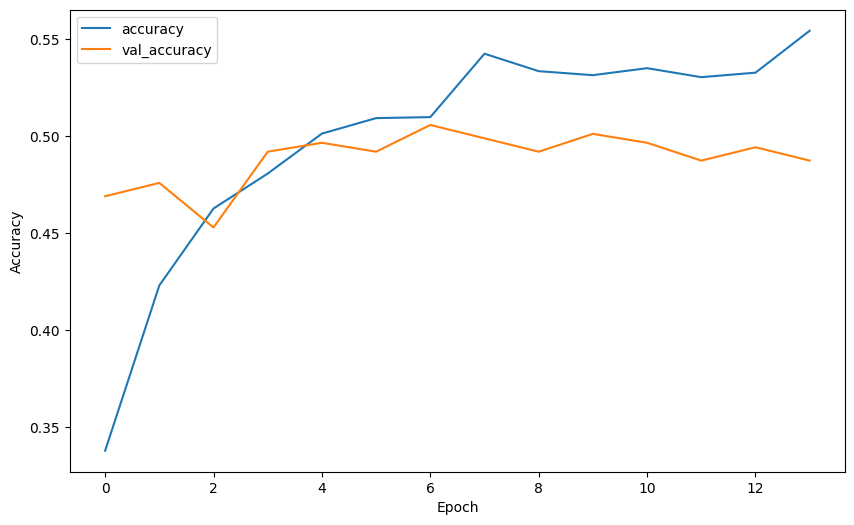

In [135]:
summary = pd.DataFrame(model_3.history.history)
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [136]:
model_3.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4416 - loss: 1.2856


[1.2518469095230103, 0.4873563349246979]

In [38]:
model_3_4 = {'model': 'model_3.4','accuracy': 0.55, 'val_accuracy': 0.48}

# Transfer Learning

# ConvNeXtTiny

In [33]:
image_gen= ImageDataGenerator(rotation_range = 15, 
                              width_shift_range = 0.1, 
                              height_shift_range=0.1, 
                              shear_range = 0.1, 
                              zoom_range = 0.2, 
                              horizontal_flip = True)


batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(256, 256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256, 256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [34]:
np.random.seed(42)
tf.random.set_seed(42)


pretrained_model = tf.keras.applications.ConvNeXtTiny(include_top=False,
                                                      weights="imagenet",
                                                      input_shape=image_shape,
                                                      pooling='avg'  
                                                      )

ConvNeXtTiny_model = Sequential()
ConvNeXtTiny_model.add(pretrained_model)
ConvNeXtTiny_model.add(Flatten())
ConvNeXtTiny_model.add(Dense(512, activation='relu'))  
ConvNeXtTiny_model.add(Dropout(0.5, seed=42))  
ConvNeXtTiny_model.add(Dense(5, activation='softmax'))  


for layer in pretrained_model.layers:
    layer.trainable = False


opt = Adam(learning_rate=0.001)


ConvNeXtTiny_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


ConvNeXtTiny_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)      │ ?                      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,820,128 (106.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27,820,128 (106.13 MB)

In [35]:
ConvNeXtTiny_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50


I0000 00:00:1714269893.546535     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714269893.581605     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269893.582024     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269893.582418     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269893.585318     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269893.585733     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269893.586197     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 24/122 ━━━━━━━━━━━━━━━━━━━━ 1:25 875ms/step - accuracy: 0.5498 - loss: 1.2918

W0000 00:00:1714269913.832127     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269913.832520     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269913.832954     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269913.835831     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269913.836166     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269913.836586     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.7229 - loss: 0.7716

W0000 00:00:1714269971.910275     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269971.910631     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269971.911039     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269971.913949     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269971.914237     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269971.914682     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.26066, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714269980.699506     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269980.699912     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269980.700247     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269980.703118     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269980.703484     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714269980.703922     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 114s 725ms/step - accuracy: 0.7236 - loss: 0.7696 - val_accuracy: 0.9034 - val_loss: 0.2607 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.9011 - loss: 0.2775
Epoch 2: val_loss improved from 0.26066 to 0.24811, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 575ms/step - accuracy: 0.9011 - loss: 0.2776 - val_accuracy: 0.9218 - val_loss: 0.2481 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.9217 - loss: 0.2077
Epoch 3: val_loss improved from 0.24811 to 0.24739, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 75s 576ms/step - accuracy: 0.9217 - loss: 0.2078 - val_accuracy: 0.9195 - val_loss: 0.2474 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.9365 - loss: 0.1856
Epoch 4: val_loss improved from 0.24739 to 0.23732, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━

In [36]:
summary = pd.DataFrame(ConvNeXtTiny_model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
12,0.976043,0.060852,0.931035,0.227397,0.0002
13,0.980680,0.057142,0.928736,0.219303,0.0001
14,0.986090,0.047331,0.935632,0.223624,0.0001
15,0.984286,0.051317,0.935632,0.222841,0.0001
16,0.988150,0.041802,0.928736,0.225487,0.0001


In [37]:
from tensorflow.keras.saving import save_model

save_model(ConvNeXtTiny_model, 'ConvNeXtTiny_model.keras')

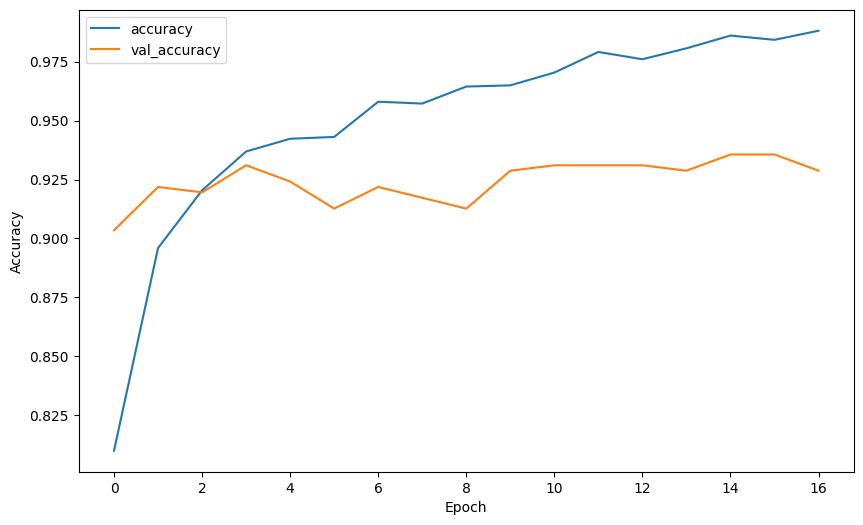

In [38]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [39]:
ConvNeXtTiny = {'model': 'ConvNeXtTiny','accuracy': 0.98,'val_accuracy': 0.92}

In [49]:
np.random.seed(42)
tf.random.set_seed(42)


pretrained_model = tf.keras.applications.ConvNeXtTiny(include_top=False,
                                                      weights="imagenet",
                                                      input_shape=image_shape,
                                                      pooling='avg'  
                                                      )

ConvNeXtTiny_model = Sequential()
ConvNeXtTiny_model.add(pretrained_model)
ConvNeXtTiny_model.add(Flatten())
ConvNeXtTiny_model.add(Dense(512, activation='relu'))  
ConvNeXtTiny_model.add(Dropout(0.5, seed=42))  
ConvNeXtTiny_model.add(Dense(5, activation='softmax'))  


for layer in pretrained_model.layers:
    layer.trainable = False


opt = Nadam(learning_rate=0.001)


ConvNeXtTiny_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


ConvNeXtTiny_model.summary()

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)      │ ?                      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,820,128 (106.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27,820,128 (106.13 MB)

In [41]:
ConvNeXtTiny_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 41:06 20s/step - accuracy: 0.1562 - loss: 2.4271

W0000 00:00:1714271188.586359     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271188.586693     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271188.587078     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271188.590253     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271188.590637     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271188.591109     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 57/122 ━━━━━━━━━━━━━━━━━━━━ 42s 660ms/step - accuracy: 0.6003 - loss: 1.0589

W0000 00:00:1714271225.664010     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271225.664461     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271225.664912     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271225.667950     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271225.668342     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271225.668862     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.6948 - loss: 0.8139

W0000 00:00:1714271263.350088     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271263.350510     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271263.350966     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271263.354181     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271263.354615     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271263.355053     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.26300, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714271267.433539     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271267.434037     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271267.434484     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271267.437546     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271267.437974     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714271267.438410     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 100s 657ms/step - accuracy: 0.6957 - loss: 0.8117 - val_accuracy: 0.9080 - val_loss: 0.2630 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9064 - loss: 0.2819
Epoch 2: val_loss did not improve from 0.26300
122/122 ━━━━━━━━━━━━━━━━━━━━ 73s 566ms/step - accuracy: 0.9064 - loss: 0.2819 - val_accuracy: 0.9218 - val_loss: 0.2663 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.9288 - loss: 0.1909
Epoch 3: val_loss improved from 0.26300 to 0.25810, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 571ms/step - accuracy: 0.9287 - loss: 0.1911 - val_accuracy: 0.9126 - val_loss: 0.2581 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.9340 - loss: 0.1906
Epoch 4: val_loss improved from 0.25810 to 0.25505, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 575ms/step - accuracy: 0.9340 -

In [42]:
summary = pd.DataFrame(ConvNeXtTiny_model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
18,0.986862,0.041716,0.928736,0.232426,0.0001
19,0.983256,0.044333,0.931035,0.230697,0.0001
20,0.987635,0.040259,0.928736,0.231502,0.0001
21,0.989181,0.040059,0.931035,0.233183,0.0001
22,0.986862,0.038181,0.931035,0.240422,0.0001


In [43]:
from tensorflow.keras.saving import save_model

save_model(ConvNeXtTiny_model, 'ConvNeXtTiny_2.keras')

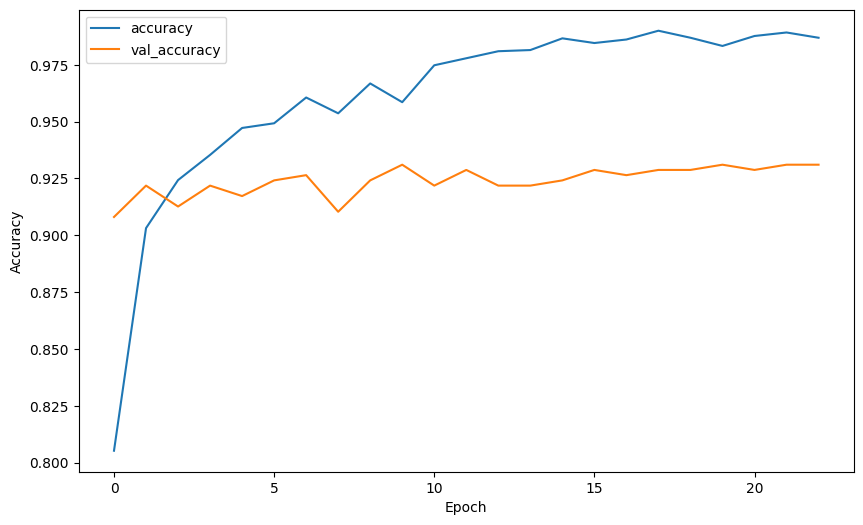

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [40]:
ConvNeXtTiny_2 = {'model': 'ConvNeXtTiny_2','accuracy': 0.98, 'val_accuracy': 0.93}

# Without ImageGenerator

In [46]:
np.random.seed(42)
tf.random.set_seed(42)


pretrained_model = tf.keras.applications.ConvNeXtTiny(include_top=False,
                                                      weights="imagenet",
                                                      input_shape=image_shape,
                                                      pooling='avg'  
                                                      )

ConvNeXtTiny_model = Sequential()
ConvNeXtTiny_model.add(pretrained_model)
ConvNeXtTiny_model.add(Flatten())
ConvNeXtTiny_model.add(Dense(512, activation='relu'))  
ConvNeXtTiny_model.add(Dropout(0.5, seed=42))  
ConvNeXtTiny_model.add(Dense(5, activation='softmax'))  


for layer in pretrained_model.layers:
    layer.trainable = False


opt = Nadam(learning_rate=0.001)


ConvNeXtTiny_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


ConvNeXtTiny_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)      │ ?                      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,820,128 (106.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27,820,128 (106.13 MB)

In [47]:
batch_size = 32
train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [48]:
ConvNeXtTiny_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 31:58 16s/step - accuracy: 0.1250 - loss: 2.7562

W0000 00:00:1714272911.093790     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272911.094288     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272911.094749     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272911.097805     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272911.098211     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272911.098723     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 10/122 ━━━━━━━━━━━━━━━━━━━━ 1:13 656ms/step - accuracy: 0.1710 - loss: 2.1808

W0000 00:00:1714272917.125128     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272917.125502     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272917.125945     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272917.129132     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272917.129551     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272917.130094     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.3962 - loss: 1.5164

W0000 00:00:1714272938.847949     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272938.848303     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272938.848649     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272938.851738     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272938.852101     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272938.852497     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.13430, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714272943.002671     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272943.002990     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272943.003407     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272943.006244     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272943.006623     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714272943.007105     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 48s 269ms/step - accuracy: 0.3971 - loss: 1.5140 - val_accuracy: 0.6161 - val_loss: 1.1343 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6731 - loss: 0.9078
Epoch 2: val_loss improved from 1.13430 to 0.92618, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.6731 - loss: 0.9076 - val_accuracy: 0.7172 - val_loss: 0.9262 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7016 - loss: 0.8017
Epoch 3: val_loss did not improve from 0.92618
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.7016 - loss: 0.8017 - val_accuracy: 0.7356 - val_loss: 1.0211 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7262 - loss: 0.7453
Epoch 4: val_loss did not improve from 0.92618
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.7263 - loss: 0.7452 - val_accuracy: 0.7402 - val_loss: 1

In [49]:
summary = pd.DataFrame(ConvNeXtTiny_model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
7,0.782071,0.605208,0.770115,1.211058,0.0002
8,0.787481,0.598644,0.767816,1.235162,0.0001
9,0.784647,0.593699,0.758621,1.250839,0.0001
10,0.787481,0.585017,0.763218,1.263035,0.0001
11,0.790057,0.577253,0.763218,1.272619,0.0001


In [50]:
from tensorflow.keras.saving import save_model

save_model(ConvNeXtTiny_model, 'ConvNeXtTiny_3.keras')

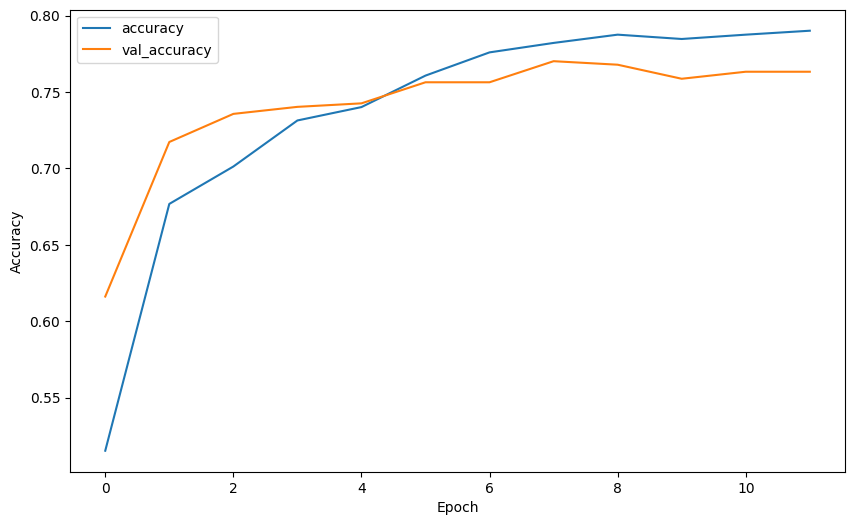

In [51]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [41]:
ConvNeXtTiny_3 = {'model': 'ConvNeXtTiny_3','accuracy': 0.78, 'val_accuracy': 0.76}

## ResNet Model

In [53]:
np.random.seed(42)
tf.random.set_seed(42)


resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= "imagenet")
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())

resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(BatchNormalization())

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.25, seed=42))               

resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

resnet_model.summary()

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)          │ ?                      │    58,370,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

In [54]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


batch_size=32

train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


test_image_gen = image_gen_scale.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)



Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [55]:
results = resnet_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen, 
                    batch_size=batch_size,
                    verbose=1,       
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50


W0000 00:00:1714273231.487416     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 73/122 ━━━━━━━━━━━━━━━━━━━━ 21s 432ms/step - accuracy: 0.3436 - loss: 1.5419

W0000 00:00:1714273262.784849     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.3650 - loss: 1.5009

W0000 00:00:1714273286.132790     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.57681, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714273298.857787     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 109s 572ms/step - accuracy: 0.3654 - loss: 1.5002 - val_accuracy: 0.2621 - val_loss: 1.5768 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.4957 - loss: 1.2798
Epoch 2: val_loss improved from 1.57681 to 1.46842, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.4958 - loss: 1.2796 - val_accuracy: 0.2851 - val_loss: 1.4684 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5447 - loss: 1.1569
Epoch 3: val_loss did not improve from 1.46842
122/122 ━━━━━━━━━━━━━━━━━━━━ 35s 283ms/step - accuracy: 0.5448 - loss: 1.1568 - val_accuracy: 0.2966 - val_loss: 2.2142 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.5720 - loss: 1.1117
Epoch 4: val_loss did not improve from 1.46842
122/122 ━━━━━━━━━━━━━━━━━━━━ 35s 284ms/step - accuracy: 0.5720 - loss: 1.1117 - val_accuracy: 0.3724 - val_loss: 

In [56]:
summary = pd.DataFrame(resnet_model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
10,0.663318,0.870748,0.526437,1.278154,0.0002
11,0.673622,0.859639,0.528736,1.205324,0.0002
12,0.687017,0.833696,0.491954,1.340637,0.0002
13,0.691911,0.809855,0.521839,1.293063,0.0001
14,0.700155,0.808665,0.616092,1.058212,0.0001


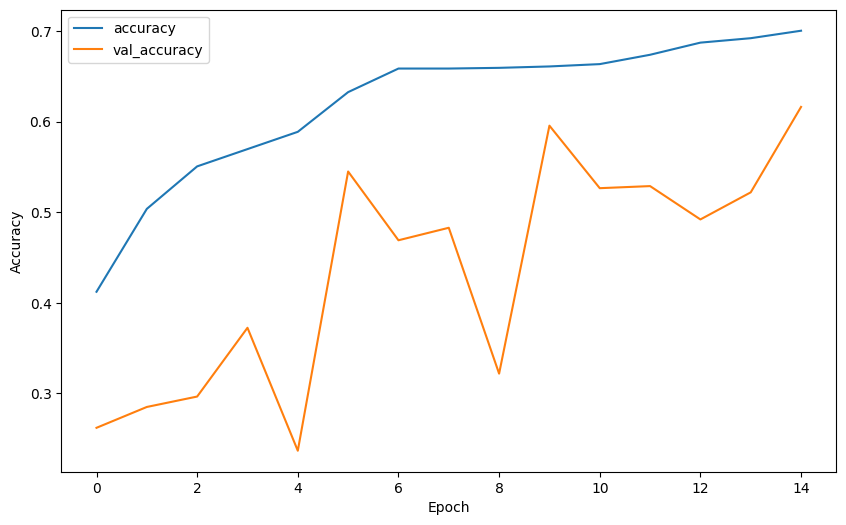

In [57]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [58]:
from tensorflow.keras.saving import save_model

save_model(resnet_model, 'resnet_model.keras')

In [59]:
resnet_model.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.6334 - loss: 1.0600


[1.058212161064148, 0.6160919666290283]

In [42]:
ResNet = {'model': 'ResNet','accuracy': 0.70, 'val_accuracy': 0.61}

# Adagrad and ResNet

In [61]:
resnet_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)          │ (None, 2048)           │    58,370,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,937,989 (224.83 MB)

 Trainable params: 566,533 (2.16 MB)

 Non-trainable params: 58,371,456 (222.67 MB)

In [62]:
results = resnet_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen, 
                    batch_size=batch_size,
                    verbose=1,       
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50


W0000 00:00:1714273841.013290     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 63/122 ━━━━━━━━━━━━━━━━━━━━ 22s 389ms/step - accuracy: 0.6856 - loss: 0.8231

W0000 00:00:1714273865.323498     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.6897 - loss: 0.8144

W0000 00:00:1714273891.479495     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from 1.03805 to 0.97075, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714273899.170719     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 90s 504ms/step - accuracy: 0.6898 - loss: 0.8143 - val_accuracy: 0.6161 - val_loss: 0.9708 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.7227 - loss: 0.7628
Epoch 2: val_loss did not improve from 0.97075
122/122 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - accuracy: 0.7226 - loss: 0.7630 - val_accuracy: 0.6115 - val_loss: 1.0198 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.6995 - loss: 0.7799
Epoch 3: val_loss did not improve from 0.97075
122/122 ━━━━━━━━━━━━━━━━━━━━ 36s 286ms/step - accuracy: 0.6996 - loss: 0.7798 - val_accuracy: 0.6161 - val_loss: 1.0159 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.7071 - loss: 0.7750
Epoch 4: val_loss improved from 0.97075 to 0.96398, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - accuracy: 0.7071 - loss: 0.7750 - val_accuracy: 0.6368 - val_loss: 0

In [63]:
summary = pd.DataFrame(resnet_model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
5,0.706079,0.780281,0.652874,0.942655,0.0010
6,0.705307,0.761650,0.636782,0.944206,0.0010
7,0.712777,0.768142,0.639080,0.949360,0.0010
8,0.708140,0.771341,0.643678,0.943809,0.0002
9,0.712519,0.763869,0.643678,0.943585,0.0002


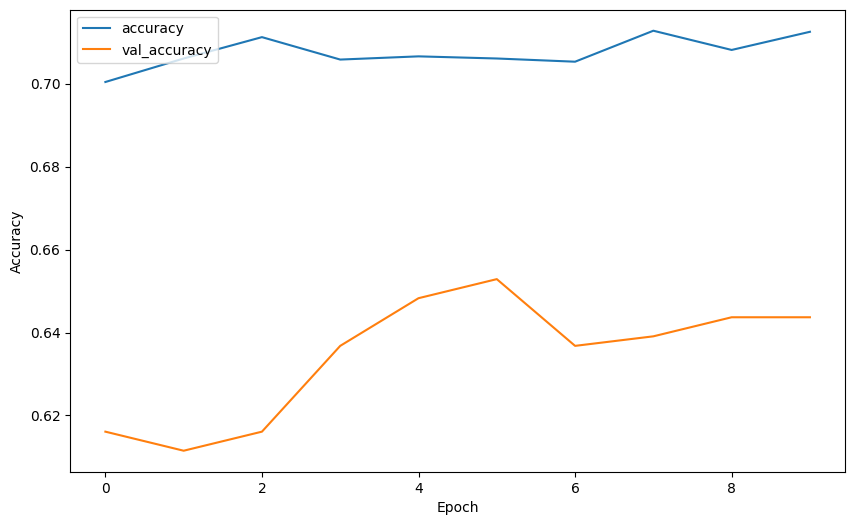

In [64]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [65]:
resnet_model.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.6311 - loss: 0.9383


[0.943585216999054, 0.6436781883239746]

In [66]:
from tensorflow.keras.saving import save_model

save_model(resnet_model, 'resnet_adagrad.keras')

In [43]:
ResNet_Adagrad = {'model': 'ResNet_Adagrad','accuracy': 0.72, 'val_accuracy': 0.64}

# VGG

In [68]:
np.random.seed(42)
tf.random.set_seed(42)


vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= "imagenet")
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3, seed=42)) 
vgg_model.add(Dense(256, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.25, seed=42)) 
vgg_model.add(Dense(5, activation='softmax'))
vgg_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [69]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


batch_size=32

train_image_gen = image_gen_scale.flow_from_directory(train_path,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse',
                                               shuffle=False)

image_gen_test = ImageDataGenerator()

test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=False)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [70]:
results = vgg_model.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
  1/122 ━━━━━━━━━━━━━━━━━━━━ 1:35:53 48s/step - accuracy: 1.0000 - loss: 0.9664

W0000 00:00:1714274282.866431     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 82/122 ━━━━━━━━━━━━━━━━━━━━ 15s 399ms/step - accuracy: 0.3268 - loss: 1.5945

W0000 00:00:1714274315.133039     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.3161 - loss: 1.5947

W0000 00:00:1714274323.117732     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 119s 592ms/step - accuracy: 0.3159 - loss: 1.5946 - val_accuracy: 0.4276 - val_loss: 2.6534
Epoch 2/50


W0000 00:00:1714274354.483432     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.3529 - loss: 1.5360 - val_accuracy: 0.4414 - val_loss: 3.2667
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.4449 - loss: 1.4454 - val_accuracy: 0.4322 - val_loss: 3.4316
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.4827 - loss: 1.4409 - val_accuracy: 0.4713 - val_loss: 3.4018
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.4675 - loss: 1.4045 - val_accuracy: 0.4805 - val_loss: 3.3125
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.4923 - loss: 1.3669 - val_accuracy: 0.4897 - val_loss: 3.4417


In [71]:
summary = pd.DataFrame(vgg_model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss
1,0.357548,1.521764,0.441379,3.266716
2,0.411386,1.463128,0.432184,3.431625
3,0.479392,1.433038,0.471264,3.401826
4,0.471922,1.399051,0.480460,3.312531
5,0.490984,1.367528,0.489655,3.441686


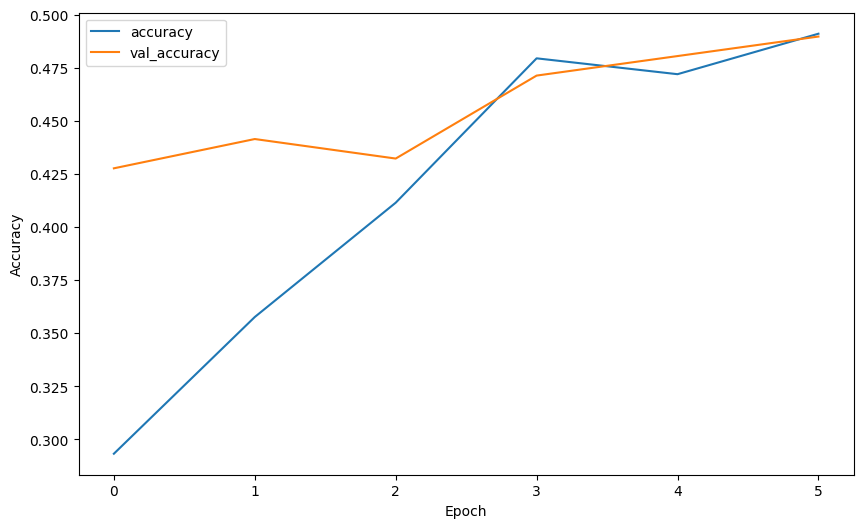

In [72]:

plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [73]:
vgg_model.evaluate(test_image_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.5089 - loss: 3.0256


[3.441685914993286, 0.48965516686439514]

In [74]:
from tensorflow.keras.saving import save_model

save_model(vgg_model, 'vgg.keras')

In [44]:
VGG = {'model': 'VGG','accuracy': 0.49,'val_accuracy': 0.48}

# Inception and Xception gave low scores

 accuracy: 0.9476 - loss: 0.1570 - val_accuracy: 0.1954 - val_loss: 72.4972
 
  accuracy: 0.9639 - loss: 0.1112 - val_accuracy: 0.1839 - val_loss: 102.9137

In [45]:
# Inception and Xception gave low scores

Inception = {'model': 'Inception','accuracy': 0.94, 'val_accuracy': 0.19} 
Xception = {'model': 'Xception','accuracy': 0.96,'val_accuracy': 0.18}

In [46]:
model_results = [model_1_0, model_1_1, model_1_2, model_1_3, model_1_4, model_2, model_3_0, model_3_1, model_3_2, model_3_3, model_3_4, 
           ConvNeXtTiny, ConvNeXtTiny_2, ConvNeXtTiny_3, ResNet, ResNet_Adagrad, VGG, Inception, Xception]

In [47]:
# Transform to DataFrame 
results_df = pd.DataFrame(model_results)

sorted_results = results_df.sort_values(by=['val_accuracy', 'accuracy' ], ascending=[False, False])

# Let's show the results by resetting the indexes
sorted_results_reset = sorted_results.reset_index(drop=True)

# Show the results;   
print(sorted_results_reset)

             model  accuracy  val_accuracy
0   ConvNeXtTiny_2      0.98          0.93
1     ConvNeXtTiny      0.98          0.92
2        model_3.3      0.87          0.84
3        model_3.1      0.85          0.82
4   ConvNeXtTiny_3      0.78          0.76
5        model_1.4      0.76          0.73
6        model_3.2      0.73          0.68
7        model_1.0      0.82          0.67
8   ResNet_Adagrad      0.72          0.64
9           ResNet      0.70          0.61
10       model_1.2      0.77          0.60
11       model_3.0      0.90          0.48
12       model_3.4      0.55          0.48
13             VGG      0.49          0.48
14       model_1.3      0.61          0.45
15         model_2      0.81          0.30
16       Inception      0.94          0.19
17        Xception      0.96          0.18
18       model_1.1      0.82          0.17


# Model Prediction and Submission

In [59]:
image_gen= ImageDataGenerator(rotation_range = 15, 
                              width_shift_range = 0.1, 
                              height_shift_range=0.1, 
                              shear_range = 0.1, 
                              zoom_range = 0.2, 
                              horizontal_flip = True)


batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(256, 256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='sparse', shuffle=True)


image_gen_test = ImageDataGenerator()
test_image_gen = image_gen_test.flow_from_directory(test_path,
                                                   target_size=(256, 256),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='sparse', shuffle=True)

Found 3882 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [60]:
np.random.seed(42)
tf.random.set_seed(42)


pretrained_model = tf.keras.applications.ConvNeXtTiny(include_top=False,
                                                      weights="imagenet",
                                                      input_shape=image_shape,
                                                      pooling='avg'  
                                                      )

ConvNeXtTiny_fmodel = Sequential()
ConvNeXtTiny_fmodel.add(pretrained_model)
ConvNeXtTiny_fmodel.add(Flatten())
ConvNeXtTiny_fmodel.add(Dense(512, activation='relu'))  
ConvNeXtTiny_fmodel.add(Dropout(0.5, seed=42))  
ConvNeXtTiny_fmodel.add(Dense(5, activation='softmax'))  


for layer in pretrained_model.layers:
    layer.trainable = False


opt = Nadam(learning_rate=0.001)


ConvNeXtTiny_fmodel.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('ConvNeXtTiny_autosave.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


ConvNeXtTiny_fmodel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)      │ ?                      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,820,128 (106.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27,820,128 (106.13 MB)

In [61]:
ConvNeXtTiny_fmodel.fit(train_image_gen,epochs=50,
                    validation_data=test_image_gen,
                    batch_size = batch_size,
                    verbose=1,
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/50


I0000 00:00:1714282698.135374     156 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714282698.170134     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282698.170511     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282698.170933     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282698.173763     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282698.174091     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282698.174519     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 61/122 ━━━━━━━━━━━━━━━━━━━━ 49s 805ms/step - accuracy: 0.6272 - loss: 1.0134

W0000 00:00:1714282746.579182     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282746.579582     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282746.580089     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282746.583165     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282746.583565     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282746.584087     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.7092 - loss: 0.8027

W0000 00:00:1714282786.641100     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282786.641442     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282786.641870     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282786.644604     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282786.645020     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282786.645454     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.28190, saving model to ConvNeXtTiny_autosave.keras


W0000 00:00:1714282796.395442     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282796.395715     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282796.396122     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282796.398866     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282796.399205     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714282796.399612     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/122 ━━━━━━━━━━━━━━━━━━━━ 126s 816ms/step - accuracy: 0.7101 - loss: 0.8005 - val_accuracy: 0.8989 - val_loss: 0.2819 - learning_rate: 0.0010
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.8993 - loss: 0.2813
Epoch 2: val_loss improved from 0.28190 to 0.26191, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 79s 609ms/step - accuracy: 0.8993 - loss: 0.2813 - val_accuracy: 0.9103 - val_loss: 0.2619 - learning_rate: 0.0010
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.9205 - loss: 0.2315
Epoch 3: val_loss improved from 0.26191 to 0.22938, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 77s 594ms/step - accuracy: 0.9205 - loss: 0.2314 - val_accuracy: 0.9264 - val_loss: 0.2294 - learning_rate: 0.0010
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9381 - loss: 0.1767
Epoch 4: val_loss improved from 0.22938 to 0.18902, saving model to ConvNeXtTiny_autosave.keras
122/122 ━━━━━━━

In [62]:
from tensorflow.keras.saving import save_model

save_model(ConvNeXtTiny_fmodel, 'ConvNeXtTiny_fmodel.keras')

In [63]:
import os
os.listdir('/kaggle/working/')

['ConvNeXtTiny_autosave.keras',
 '.virtual_documents',
 'ConvNeXtTiny_fmodel.keras']

In [65]:
test_image_gen = image_gen_scale.flow_from_directory(test_path,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   class_mode='sparse', shuffle=True)

Found 435 images belonging to 5 classes.


In [66]:
pred_probabilities = ConvNeXtTiny_fmodel.predict(test_image_gen)

 2/14 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step

W0000 00:00:1714283892.797064     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283892.797369     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283892.797786     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283892.800722     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283892.801082     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283892.801469     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step


W0000 00:00:1714283898.539572     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283898.539998     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283898.540287     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283898.543328     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283898.543727     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714283898.544217     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Test our model by comparing with original

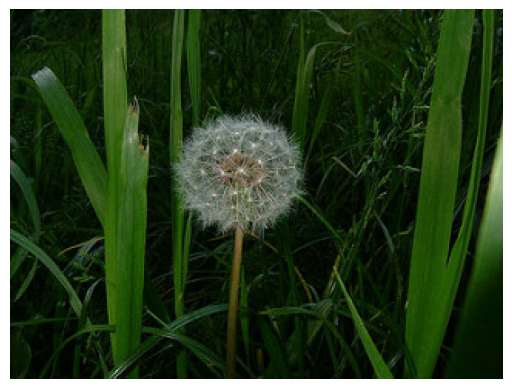

In [71]:
# Our original image from test folder
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/flowers/test/dandelion/14283011_3e7452c5b2_n.jpg'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


W0000 00:00:1714284265.216252     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.216684     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.217114     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.217935     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.218354     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.218769     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.219182     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714284265.219590     156 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


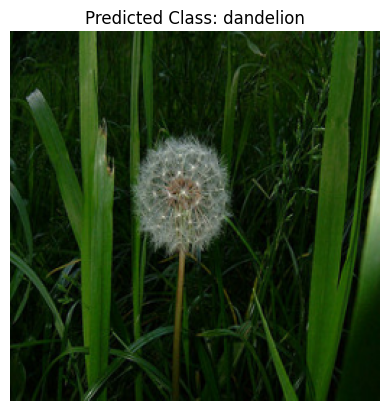

In [70]:
from PIL import Image
import numpy as np
from keras.preprocessing import image as keras_image
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/flowers/test/dandelion/14283011_3e7452c5b2_n.jpg'
image = Image.open(image_path)

# Resize the image to match model input shape
image = image.resize((256, 256))

# Preprocess the image for prediction
img = keras_image.img_to_array(image)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Predict using the model
predictions = ConvNeXtTiny_fmodel.predict(img)

# Decode the prediction
class_index = np.argmax(predictions)
if class_index == 0:
    class_label = "daisy"
elif class_index == 1:
    class_label = "dandelion"
elif class_index == 2:
    class_label = "rose"
elif class_index == 3:
    class_label = "sunflower"
else:
    class_label = "tulip"

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.title("Predicted Class: " + class_label)  # Display predicted class
plt.show()
